# Module 15 Regression Analysis

**Topics**:
- Regression analysis
- Using Scikit Learn
- mean absolute error
- mean squared error

In [1]:
import matplotlib.pyplot as plot
import numpy as np

In [2]:
# Given a list of numrical values compute the mean.
def my_mean(m):
    
    total = 0.0
    
    for item in m:
        total = total + float(item)
        
    return float(total)/len(m)

In [3]:
# Given  X and Y of numerical value, compute the w1 coefficient of the linear regression model.
def my_w1(X, Y):
    
    x_mean = my_mean(X)
    y_mean = my_mean(Y)
    
    num = 0.0
    den = 0.0
    
    for index in range(len(X)):
        
        num = num + (X[index] - x_mean) * (Y[index] - y_mean)
        den = den + (X[index] - x_mean) * (X[index] - x_mean)
        
    return(num/den)

In [4]:
# Given X and Y of numerical values, compute the w0 coeficient of the linear regression model
def my_w0(X, Y):
    
    mean_y = my_mean(Y)
    mean_x = my_mean(X)
    
    return mean_y - my_w1(X, Y) * mean_x

In [5]:
# Create two lists of integers
S = [3, 8, 9, 13, 3, 6, 11, 21, 1, 16]
T = [30, 57, 64, 72, 36, 43, 59, 90, 20, 83]

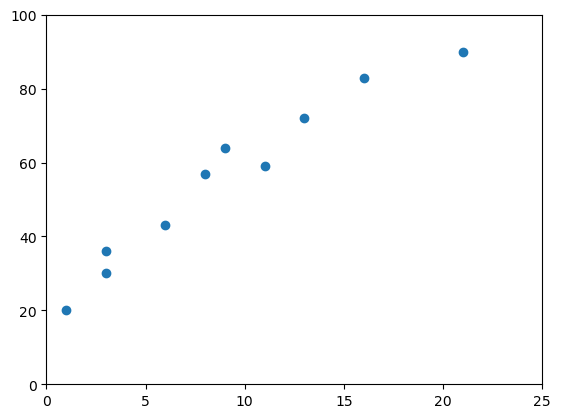

In [6]:
# Plot the points - plot the pairs of points
plot.axis([0, 25, 0, 100])
plot.plot(S, T, 'o')

In [7]:
# Compute the w1 and w0 of regression model
w1 = my_w1(S, T)
w0 = my_w0(S, T)

In [8]:
# Make some predictions
t_predicted = []

for item in S:
    
    y = w1 * item + w0
    t_predicted.append(y)
    
# See the results
t_predicted

[33.821398718305936,
 51.50877681805517,
 55.04625243800501,
 69.19615491780439,
 33.821398718305936,
 44.43382557815548,
 62.12120367790471,
 97.49595987740318,
 26.74644747840624,
 79.80858177765394]

In [9]:
T

[30, 57, 64, 72, 36, 43, 59, 90, 20, 83]

### Visualize the regression line

In [10]:
x_samples = np.linspace(0, 25, 1000)
y_samples = []

for item in x_samples:
    y_samples.append(w0+w1*item)

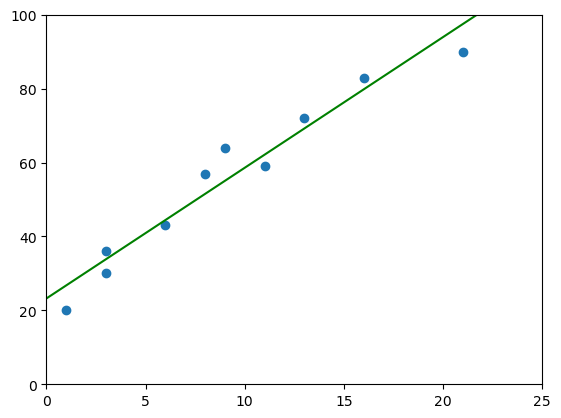

In [11]:
plot.axis([0, 25, 0, 100])
plot.plot(S, T, 'o')
plot.plot(x_samples, y_samples, color='green')

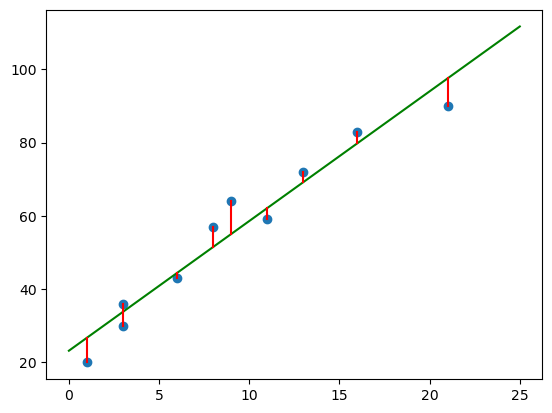

In [12]:
# Plot the error - red line segment represents the error.
plot.plot(S, T, 'o')
plot.plot(x_samples, y_samples, color='green')

for index in range(len(S)):
    
    x_pair = [S[index], S[index]]
    y_pair = [T[index], t_predicted[index]]
    
    plot.plot(x_pair, y_pair, color='red' )

In [13]:
print(w1)
print('\n')
print(w0)

3.5374756199498467


23.208971858456394


In [14]:
# Create a prediction function
def my_prediction(w1, w0, X):
    
    result = []
    
    for item in X:
        
        result.append(w1*item + w0)
    
    return result

In [15]:
# Predict Y values of S.
T_predicted = my_prediction(w1, w0, S)

print(T_predicted)

[33.821398718305936, 51.50877681805517, 55.04625243800501, 69.19615491780439, 33.821398718305936, 44.43382557815548, 62.12120367790471, 97.49595987740318, 26.74644747840624, 79.80858177765394]


In [16]:
import math

In [17]:
# Compute the mean absolute error (MSE)
def mean_abs_error(Y, Y_head):
    
    error = 0
    
    for index in range(len(Y)):
        
        error = error + math.fabs(Y[index] - Y_head[index])
    
    return error/len(Y)

In [18]:
print(mean_abs_error(T, t_predicted))

4.523767066035109


In [19]:
def mean_squared_error(Y, Y_head):
    
    error = 0
    
    for index in range(len(Y)):
        
        error = error + math.pow((Y[index] - Y_head[index]), 2)
        
    return error/len(Y)                                

In [20]:
print(mean_squared_error(T, t_predicted))

26.122095291167476


## Using Scikit Learn

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# make P and Q 5x1 matrices
P = [1.0, 2.0, 3.0, 4.0, 5.0]
Q = [1.0, 2.0, 1.3, 3.75, 2.25]

P = np.array(P).reshape((5,1))
Q = np.array(Q).reshape((5,1))

In [23]:
print(P)
print('\n')
print(Q)

[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


[[1.  ]
 [2.  ]
 [1.3 ]
 [3.75]
 [2.25]]


In [24]:
# Create a Linear Regression Model
linreg = LinearRegression()

In [25]:
linreg.fit(P, Q)

LinearRegression()

In [26]:
# w1 is
linreg.coef_

array([[0.425]])

In [27]:
# w0 is
linreg.intercept_

array([0.785])

In [28]:
# Predict values for Q
predicted_Q = linreg.predict(P)

print(predicted_Q)

[[1.21 ]
 [1.635]
 [2.06 ]
 [2.485]
 [2.91 ]]


In [29]:
# show true Q values
Q

array([[1.  ],
       [2.  ],
       [1.3 ],
       [3.75],
       [2.25]])

- Using Q and predicted Q values to plot the red points.
- Draw a diagonal green line
- **Note**: If a point is on the green line exactly, that means it is 100% accurate - predicted value is equal to the real value.

Text(0, 0.5, 'predicted values')

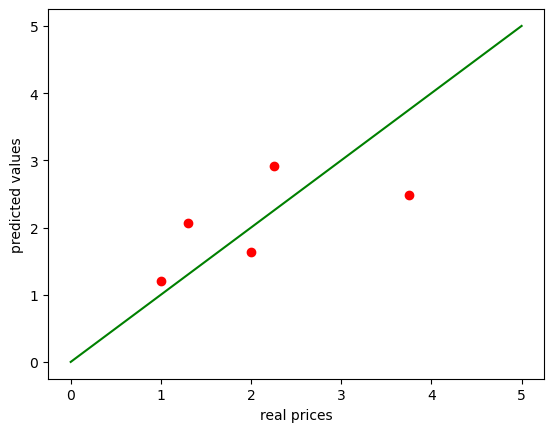

In [30]:
# Plot the values
plot.plot(Q, predicted_Q, 'ro')
plot.plot([0,5],[0,5], 'g-')
plot.xlabel('real prices')
plot.ylabel('predicted values')

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
# mean absolute error
mean_absolute_error(Q, predicted_Q)

0.6519999999999999

In [33]:
# mean squared error
mean_squared_error(Q, predicted_Q)

0.5581499999999998